In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
!pip install regression

In [21]:
dataset=pd.read_csv("C:/Real estate.csv")


In [22]:
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [23]:
dataset.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [24]:
dataset.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [29]:
dataset=pd.read_csv("C:/Real estate.csv")
x= dataset.iloc[:,[2,3]].values
y= dataset.iloc[:,4].values

In [30]:
#SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET OF LOGISTIC REGRESSION
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [31]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
#FITTING LOGISTIC REGRESSION TO THE TRAINING SET
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [33]:
#prediciting the test set results
y_pred=classifier.predict(x_test)
df=pd.DataFrame({'Actual':y_test,"Predict":y_pred})
print(df)

     Actual  Predict
0         1        5
1         0        0
2         6        8
3         0        0
4         1        5
..      ...      ...
133       4        0
134       2        0
135       0        0
136       8        8
137       4        5

[138 rows x 2 columns]


In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0  4  0  5  0  0  1  0  0]
 [10  0  0  0  0  6  0  0  1  0  0]
 [ 7  0  0  0  0  1  0  0  2  0  0]
 [10  0  0  0  0  0  0  0  1  0  0]
 [ 2  0  0  3  0  4  0  0  1  0  0]
 [ 0  0  0  1  0 17  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  2  0  0]
 [ 0  0  0  0  0  8  0  0  5  0  0]
 [ 0  0  0  0  0  5  0  0  7  0  0]
 [ 0  0  0  0  0  8  0  0  3  0  0]
 [ 0  0  0  0  0  3  0  0  1  0  0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

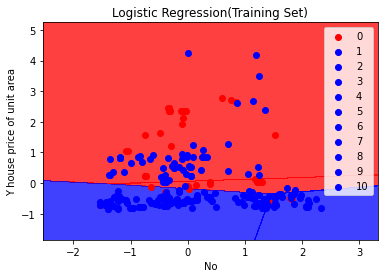

In [43]:
#Visualising the training set results

from matplotlib.colors import ListedColormap
x_set, y_set=x_train, y_train
x1,x2 = np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75,
                cmap = ListedColormap(('red','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
          plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('No')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()
        

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

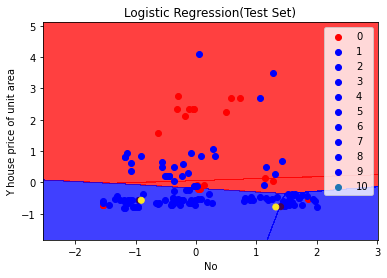

In [44]:
from matplotlib.colors import ListedColormap
x_set, y_set=x_test, y_test
x1,x2 = np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75,
                cmap = ListedColormap(('red','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
          plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
plt.title('Logistic Regression(Test Set)')
plt.xlabel('No')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()
        

In [45]:
x = dataset.iloc[:, 1:3].values
print ("\nOriginal data values : \n", x)


Original data values : 
 [[2.012917e+03 3.200000e+01]
 [2.012917e+03 1.950000e+01]
 [2.013583e+03 1.330000e+01]
 [2.013500e+03 1.330000e+01]
 [2.012833e+03 5.000000e+00]
 [2.012667e+03 7.100000e+00]
 [2.012667e+03 3.450000e+01]
 [2.013417e+03 2.030000e+01]
 [2.013500e+03 3.170000e+01]
 [2.013417e+03 1.790000e+01]
 [2.013083e+03 3.480000e+01]
 [2.013333e+03 6.300000e+00]
 [2.012917e+03 1.300000e+01]
 [2.012667e+03 2.040000e+01]
 [2.013500e+03 1.320000e+01]
 [2.013583e+03 3.570000e+01]
 [2.013250e+03 0.000000e+00]
 [2.012750e+03 1.770000e+01]
 [2.013417e+03 1.690000e+01]
 [2.012667e+03 1.500000e+00]
 [2.013417e+03 4.500000e+00]
 [2.013417e+03 1.050000e+01]
 [2.012917e+03 1.470000e+01]
 [2.013083e+03 1.010000e+01]
 [2.013000e+03 3.960000e+01]
 [2.013083e+03 2.930000e+01]
 [2.012667e+03 3.100000e+00]
 [2.013250e+03 1.040000e+01]
 [2.013500e+03 1.920000e+01]
 [2.013083e+03 7.100000e+00]
 [2.013500e+03 2.590000e+01]
 [2.012750e+03 2.960000e+01]
 [2.012750e+03 3.790000e+01]
 [2.013250e+03 1.

In [47]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation :\n", x_after_Standardisation)



After min max Scaling : 
 [[0.27292576 0.73059361]
 [0.27292576 0.44520548]
 [1.         0.30365297]
 [0.90938865 0.30365297]
 [0.18122271 0.11415525]
 [0.         0.16210046]
 [0.         0.78767123]
 [0.81877729 0.46347032]
 [0.90938865 0.72374429]
 [0.81877729 0.4086758 ]
 [0.45414847 0.79452055]
 [0.72707424 0.14383562]
 [0.27292576 0.29680365]
 [0.         0.46575342]
 [0.90938865 0.30136986]
 [1.         0.81506849]
 [0.63646288 0.        ]
 [0.09061135 0.40410959]
 [0.81877729 0.38584475]
 [0.         0.03424658]
 [0.81877729 0.10273973]
 [0.81877729 0.23972603]
 [0.27292576 0.33561644]
 [0.45414847 0.23059361]
 [0.36353712 0.90410959]
 [0.45414847 0.66894977]
 [0.         0.07077626]
 [0.63646288 0.23744292]
 [0.90938865 0.43835616]
 [0.45414847 0.16210046]
 [0.90938865 0.5913242 ]
 [0.09061135 0.67579909]
 [0.09061135 0.8652968 ]
 [0.63646288 0.37671233]
 [0.09061135 0.35159817]
 [0.90938865 0.3173516 ]
 [0.27292576 0.33561644]
 [0.54585153 0.2739726 ]
 [0.         0.07077626